### Dataset Description
#### Overview
The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

#### Data Dictionary

| Variable  | Definition                                 | Key                                         |
|-----------|--------------------------------------------|---------------------------------------------|
| survival  | Survival                                   | 0 = No, 1 = Yes                              |
| pclass    | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                    |
| sex       | Sex                                        |                                             |
| Age       | Age in years                               |                                             |
| sibsp     | # of siblings / spouses aboard the Titanic |                                             |
| parch     | # of parents / children aboard the Titanic |                                             |
| ticket    | Ticket number                              |                                             |
| fare      | Passenger fare                             |                                             |
| cabin     | Cabin number                               |                                             |
| embarked  | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton|

#### Variable Notes
**`pclass`**: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**`age`**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\
**`sibsp`**: The dataset defines family relations in this way...\
Sibling = brother, sister, stepbrother, stepsister\
Spouse = husband, wife (mistresses and fiancés were ignored)\
**`parch`**: The dataset defines family relations in this way...\
Parent = mother, father\
Child = daughter, son, stepdaughter, stepson\

Some children travelled only with a nanny, therefore parch=0 for them.

# Import the Libraries

In [232]:
# Import the Libraries
# 1. To handle data
import pandas as pd
import numpy as np
# 2. To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# 3. To preprocess data

# Load the Dataset

In [233]:
df = pd.read_csv('/content/train.csv')
df_copy = df.copy()
df_test = pd.read_csv('/content/test.csv')


## Let's Explore the Data

### Sneak Preview of Data

Achieve a rapid glimpse of your dataset with just one line of code! This convenient approach allows you to swiftly review the initial rows of your data, providing you with an instant grasp of the dataset's content without the need to scroll through the entire file.

In [234]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [235]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### View Column Names

In [236]:
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [237]:
print(df_test.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


### View Column Data Types

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### View the shape of Our dataset

In [239]:
#view the shape of the data, number of rows & columns
# df.shape[0] give information about the rows and df.shape[1] gives information about columns
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe has 891 rows and 12 columns


# ***Task 1: Statistical Analysis:***

### Summary of Data Characteristics

Descriptive statistics are employed to succinctly summarize and gain insight into the fundamental characteristics of the dataset.

In [240]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [241]:
df.describe(include=object).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


# ***Task 2: Fill the gaps***

#### Gain Clarity on Missing Data

Use this helpful code snippet to obtain a more comprehensive understanding of missing data in your dataset. This code calculates and presents the percentage of null values in your dataset, sorted in ascending order. This approach simplifies the process of identifying which features exhibit the highest degree of missing data.

In [242]:
missing_values = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_values

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

#### Visualizing Null Value Distribution

We will create a graphical representation of null value percentages by employing an appropriate charting technique. This visualization will aid in understanding the distribution of missing data within the dataset.

Text(0.5, 1.0, 'Percentage of Null Values')

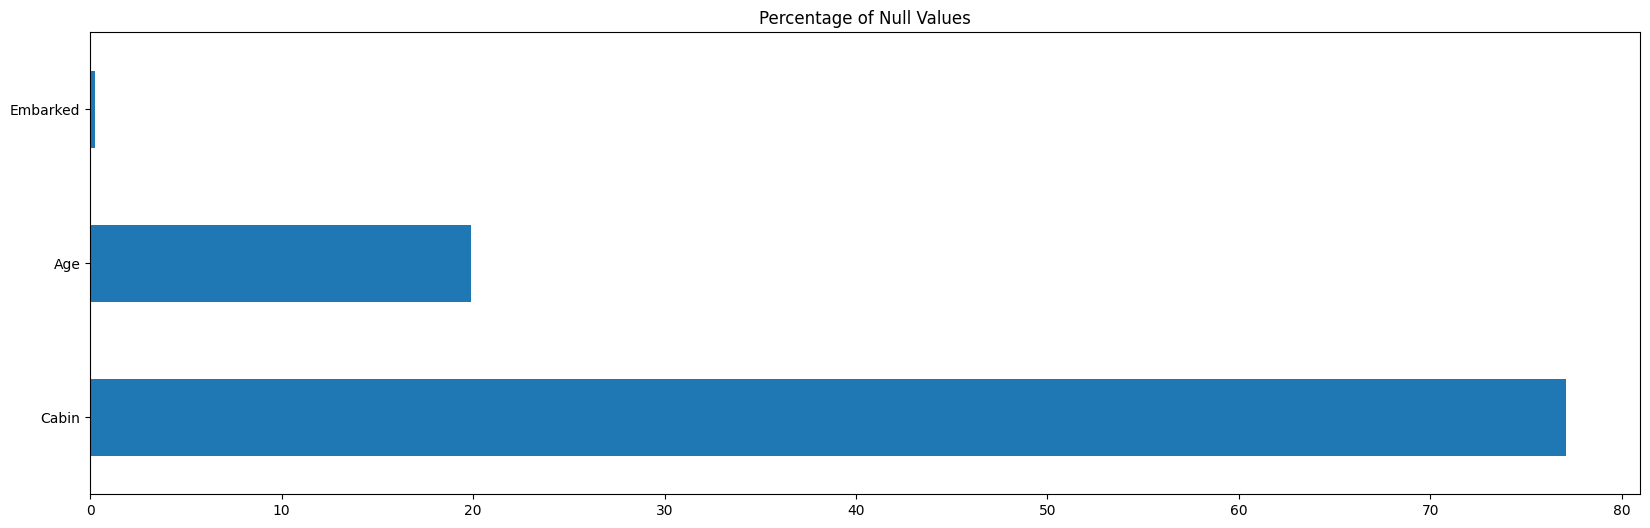

In [243]:
missing_values = missing_values[missing_values != 0] # Only the missing data
plt.rcParams['figure.figsize'] = (20,6)
missing_values.plot(kind = 'barh')
plt.title("Percentage of Null Values")

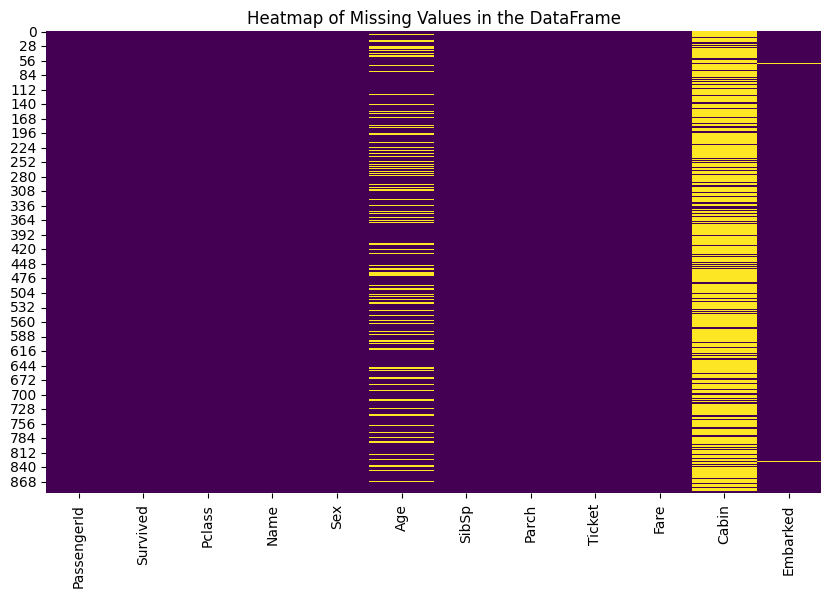

In [244]:
# Plot the null values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Heatmap of Missing Values in the DataFrame")
plt.show()

**`Observation`**: We find that the Percentage of Missing Values in **Cabin** Column is **77%**. So , We can remove this column from our dataset

In [245]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Set a threshold for dropping columns (e.g., more than 25% missing)
threshold = 25
columns_to_drop = missing_values[missing_values > threshold].index
df.drop(columns=columns_to_drop, inplace=True)
print("Columns dropped:", columns_to_drop)

# Impute 'Age' using Iterative Imputer
imputer = IterativeImputer()
df[['Age']] = imputer.fit_transform(df[['Age']])

# Impute 'Embarked' with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


Columns dropped: Index(['Cabin'], dtype='object')


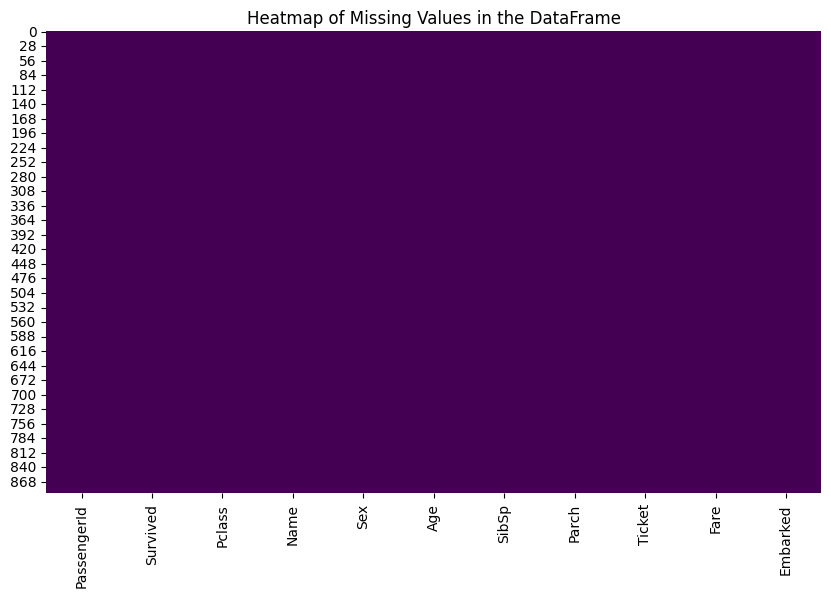

In [246]:
# Plot the null values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Heatmap of Missing Values in the DataFrame")
plt.show()

In [247]:
# Find the Duplicates if Any
df.duplicated().any()

False

# ***Task 3: Preparing the data***

In [248]:
# Encode 'Sex' using Label Encoding
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Encode 'Embarked' using One-Hot Encoding
one_hot_encoder = OneHotEncoder(drop='first')  # drop='first' to avoid dummy variable trap
embarked_encoded = one_hot_encoder.fit_transform(df[['Embarked']]).toarray()
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=one_hot_encoder.get_feature_names_out(['Embarked']))
df = pd.concat([df, embarked_encoded_df], axis=1)
df.drop(columns=['Embarked'], inplace=True)

# Create a 'Family' feature and an 'IsAlone' feature
df['Family'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['Family'] == 0).astype(int)


# Drop irrelevant columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], inplace=True)

# Display the cleaned dataset
df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,Family,IsAlone
0,0,3,1,22.0,7.2500,0.0,1.0,1,0
1,1,1,0,38.0,71.2833,0.0,0.0,1,0
2,1,3,0,26.0,7.9250,0.0,1.0,0,1
3,1,1,0,35.0,53.1000,0.0,1.0,1,0
4,0,3,1,35.0,8.0500,0.0,1.0,0,1


#### Number of Unique Values in Each Column

In [249]:
# Return Number of Unique Values from all columns
df.nunique()

Survived        2
Pclass          3
Sex             2
Age            89
Fare          248
Embarked_Q      2
Embarked_S      2
Family          9
IsAlone         2
dtype: int64

# ***Task 4: Launch the model***

In [250]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Separate features and target variable
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)



In [251]:
# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

Accuracy: 0.8045
Cross-validation scores: [0.77094972 0.80337079 0.79775281 0.79775281 0.8258427 ]
Mean cross-validation score: 0.7991


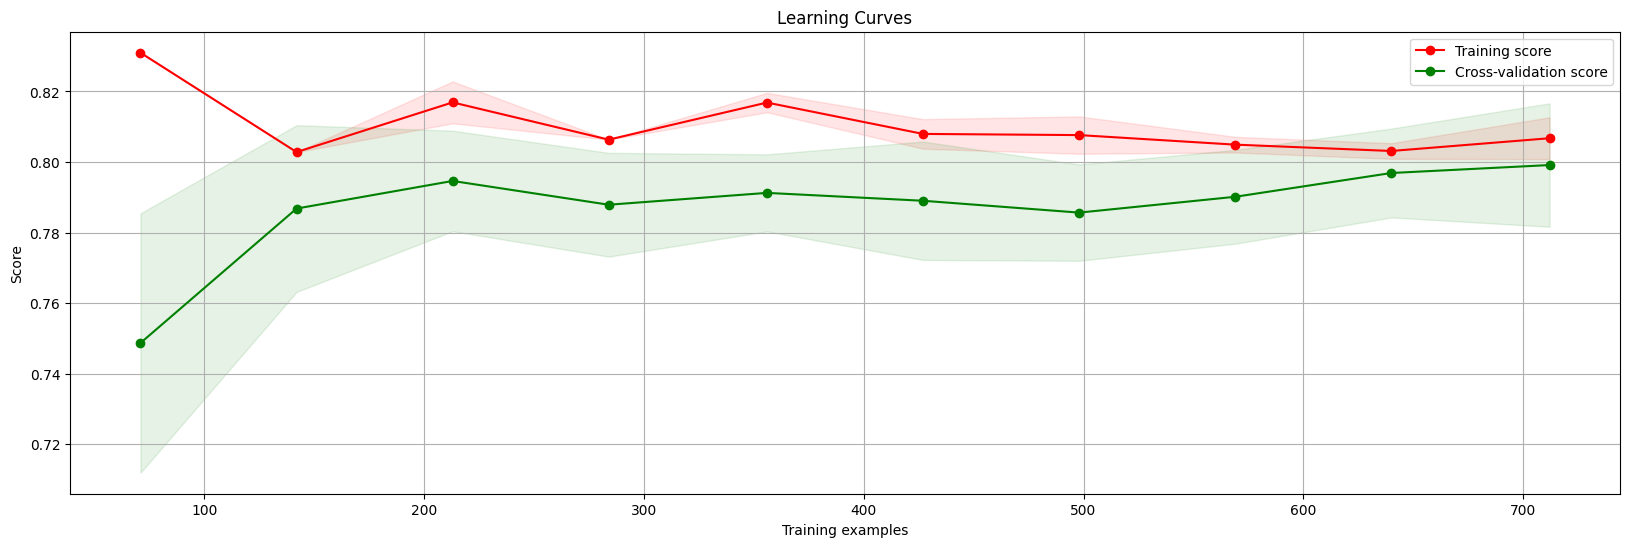

In [252]:
# Function to plot learning curves
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    from sklearn.model_selection import learning_curve

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, n_jobs=-1, scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
plot_learning_curve(model, X, y)
plt.show()

In [254]:
# Extract titles from the 'Name' column
df_copy['Title'] = df_copy['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Display the count of each title
print(df_copy['Title'].value_counts())


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


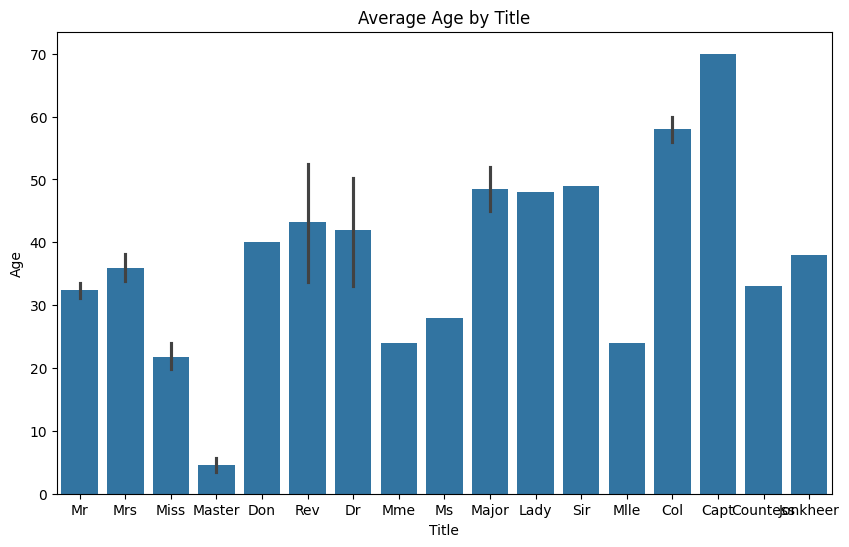

In [255]:
# Plot the relationship between titles and age
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Age', data=df_copy)
plt.title('Average Age by Title')
plt.xlabel('Title')
plt.ylabel('Age')
plt.show()


In [256]:
# Calculate mean age for each title
title_ages = df_copy.groupby('Title')['Age'].mean()

# Transform means into a dictionary for future mapping
title_age_dict = title_ages.to_dict()
print(title_age_dict)


{'Capt': 70.0, 'Col': 58.0, 'Countess': 33.0, 'Don': 40.0, 'Dr': 42.0, 'Jonkheer': 38.0, 'Lady': 48.0, 'Major': 48.5, 'Master': 4.574166666666667, 'Miss': 21.773972602739725, 'Mlle': 24.0, 'Mme': 24.0, 'Mr': 32.368090452261306, 'Mrs': 35.898148148148145, 'Ms': 28.0, 'Rev': 43.166666666666664, 'Sir': 49.0}


In [257]:
# Transform means into a dictionary for future mapping
title_age_dict = title_ages.to_dict()
print(title_age_dict)

{'Capt': 70.0, 'Col': 58.0, 'Countess': 33.0, 'Don': 40.0, 'Dr': 42.0, 'Jonkheer': 38.0, 'Lady': 48.0, 'Major': 48.5, 'Master': 4.574166666666667, 'Miss': 21.773972602739725, 'Mlle': 24.0, 'Mme': 24.0, 'Mr': 32.368090452261306, 'Mrs': 35.898148148148145, 'Ms': 28.0, 'Rev': 43.166666666666664, 'Sir': 49.0}


In [258]:
# Impute ages based on titles
df_copy['Age'] = df_copy.apply(lambda row: title_age_dict[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)


In [259]:
# Verify that there are no more missing values in the 'Age' column
print(df_copy['Age'].isnull().sum())

0


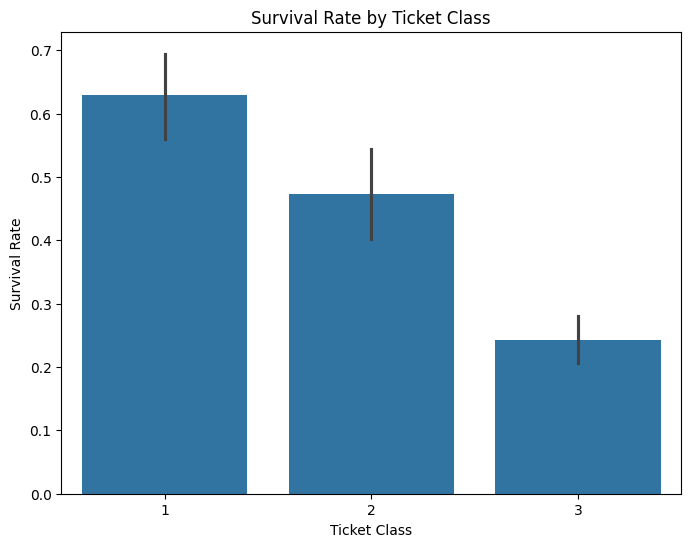

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df_copy)
plt.title('Survival Rate by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate')
plt.show()


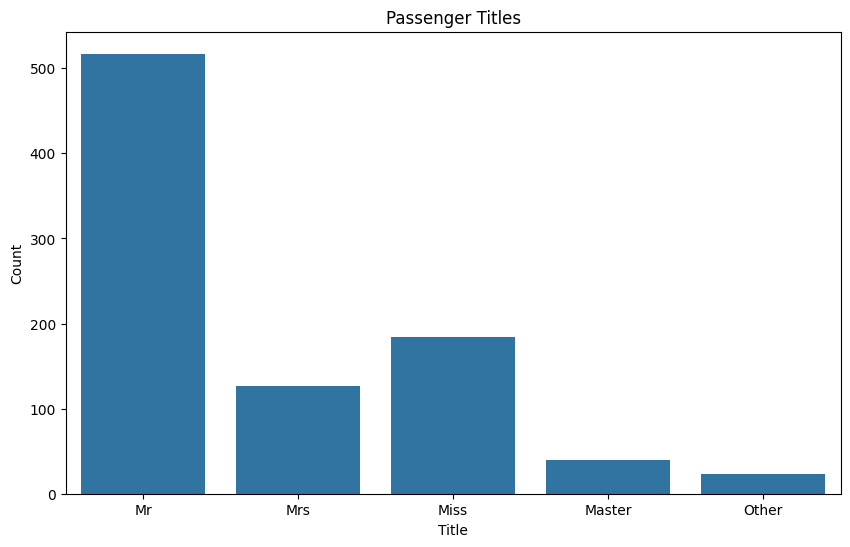

In [262]:
# Group titles
df_copy['Title'] = df_copy['Title'].replace(['Mme', 'Ms'], 'Mrs')
df_copy['Title'] = df_copy['Title'].replace(['Mlle'], 'Miss')
df_copy['Title'] = df_copy['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Other')

# Plot 'Title' categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Title', data=df_copy)
plt.title('Passenger Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()


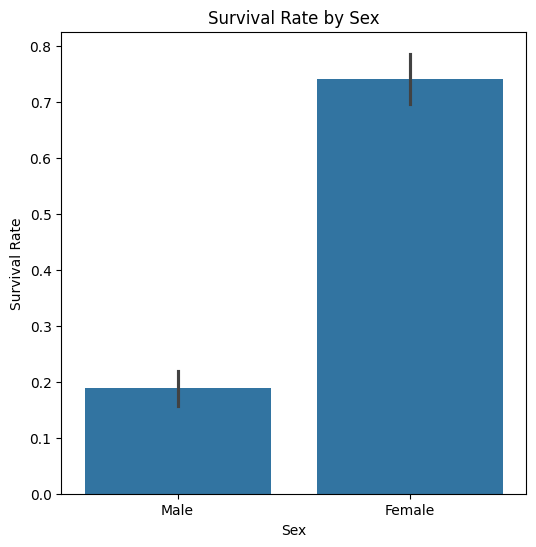

In [263]:
plt.figure(figsize=(6, 6))
sns.barplot(x='Sex', y='Survived', data=df_copy)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()


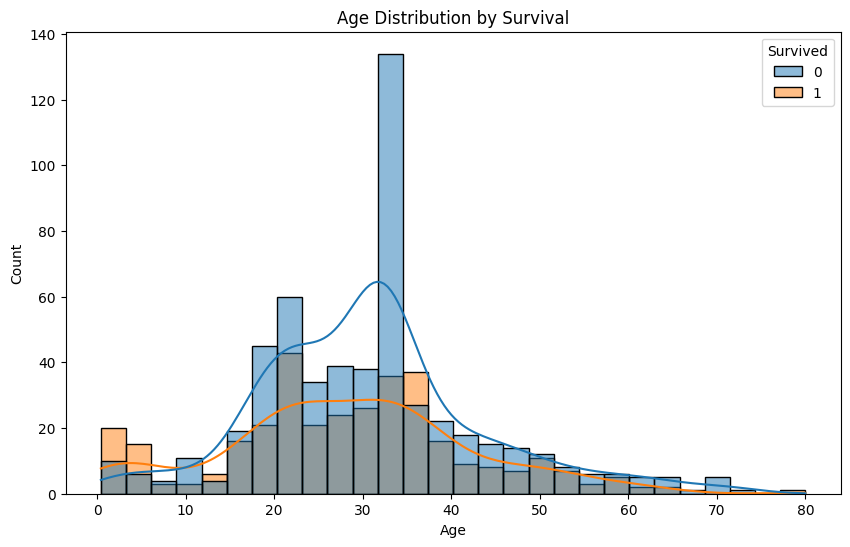

In [264]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_copy, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


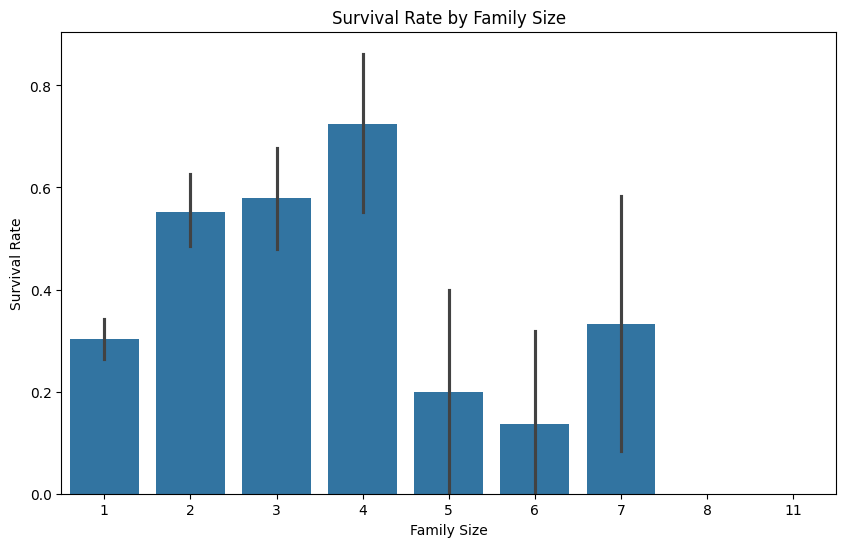

In [266]:
# Create 'FamilySize' feature
df_copy['FamilySize'] = df_copy['SibSp'] + df_copy['Parch'] + 1

plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df_copy)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


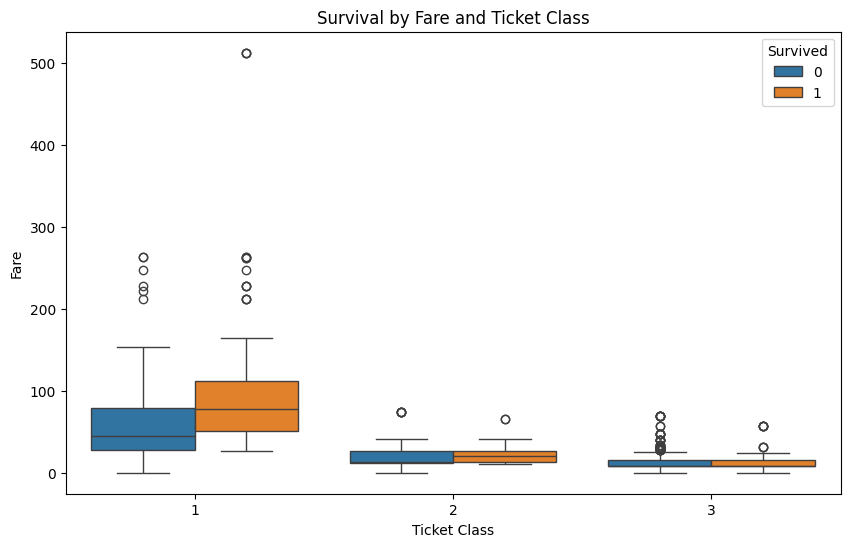

In [267]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df_copy)
plt.title('Survival by Fare and Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Fare')
plt.show()


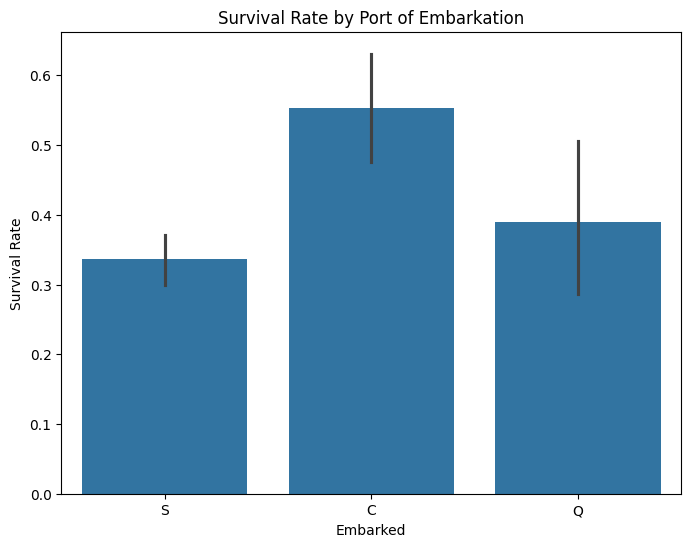

In [268]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=df_copy)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()